In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
from quasar_drw import quasar_drw as qso_drw
from quasar_drw import lc_generator as lc_gen
import qso_lc_fct as qso

In [4]:
from astropy.io import ascii

In [5]:
import os
import glob
import h5py

## Get ID list
Use glob: need to put file in the same diretory, otherwise it returns path information as well

In [6]:
name_list = glob.glob("J0*")
print(name_list)

['J063957.89-432307.77', 'J064018.84-424900.38', 'J064320.82-430438.63', 'J064532.50-431756.04', 'J064908.74-424427.99']


## Write to HDF5

In [7]:
dt = h5py.special_dtype(vlen=str) 
name_list = np.array(name_list, dtype=dt)
print(name_list)

['J063957.89-432307.77' 'J064018.84-424900.38' 'J064320.82-430438.63'
 'J064532.50-431756.04' 'J064908.74-424427.99']


In [8]:
if os.path.isfile("DES_qso.h5"):
    !rm DES_qso.h5
    
f = h5py.File("DES_qso.h5", "w")
f.create_dataset("/ID", data=name_list)

<HDF5 dataset "ID": shape (5,), type "|O">

In [9]:
for i, name in enumerate(name_list):
    path = str(name_list[i]) + "/g.csv"
    data = ascii.read(path)
    
    g_mjd           = np.array(data["MJD_OBS"], dtype=float)
    g_flux_auto     = np.array(data["FLUX_AUTO"], dtype=float)
    g_flux_err_auto = np.array(data["FLUX_ERR_AUTO"], dtype=float)
    
    f.create_dataset(str(name_list[i])+"/g_mjd",           data=g_mjd)
    f.create_dataset(str(name_list[i])+"/g_flux_auto",     data=g_flux_auto)
    f.create_dataset(str(name_list[i])+"/g_flux_err_auto", data=g_flux_err_auto)
    

## Inspect HDF5 data

In [10]:
f_read = h5py.File("DES_qso.h5", "r")

In [11]:
for name in f_read:
    print(name)

ID
J063957.89-432307.77
J064018.84-424900.38
J064320.82-430438.63
J064532.50-431756.04
J064908.74-424427.99


In [12]:
def printname(name):
    print(name)

f_read.visit(printname)

ID
J063957.89-432307.77
J063957.89-432307.77/g_flux_auto
J063957.89-432307.77/g_flux_err_auto
J063957.89-432307.77/g_mjd
J064018.84-424900.38
J064018.84-424900.38/g_flux_auto
J064018.84-424900.38/g_flux_err_auto
J064018.84-424900.38/g_mjd
J064320.82-430438.63
J064320.82-430438.63/g_flux_auto
J064320.82-430438.63/g_flux_err_auto
J064320.82-430438.63/g_mjd
J064532.50-431756.04
J064532.50-431756.04/g_flux_auto
J064532.50-431756.04/g_flux_err_auto
J064532.50-431756.04/g_mjd
J064908.74-424427.99
J064908.74-424427.99/g_flux_auto
J064908.74-424427.99/g_flux_err_auto
J064908.74-424427.99/g_mjd


## Read-in from HDF5

In [13]:
ID = f_read["ID"][:]
print(ID)

['J063957.89-432307.77' 'J064018.84-424900.38' 'J064320.82-430438.63'
 'J064532.50-431756.04' 'J064908.74-424427.99']


In [14]:
mjd  = f_read["J063957.89-432307.77/g_mjd"][:]
flux = f_read["J063957.89-432307.77/g_mjd"][:]

In [15]:
print(mjd)

[ 56520.1846236  56520.2055066  56520.2223636  56534.1543065  56538.1607714
  56578.9989836  56609.0398133  56615.0811593  56650.0486865  56657.0451006
  56667.0591772  56675.0713019  56877.1790132  56903.1067038  56912.0826296
  56920.0612533  56924.1413494  56930.1139305  56953.0307348  56961.0089414
  56990.029041   57025.0434686  57037.0602884  57051.0360736  57252.2287837
  57257.2115776  57344.0339955  57355.1418184  57372.0311643  57386.0419067
  57407.0415411  57614.2211698  57623.2081044  57627.3498881  57629.2031291
  57645.0737151  57657.1949693  57661.0656794  57670.9938664  57682.0028383
  57701.0260283  57708.0496601  57718.0283077  57719.0290575  57723.1161597
  57730.0391813  57740.0435626  57747.0431549  57759.0633547  57772.0395932
  57780.0370207]


In [16]:
font = {'weight' : 'bold',
        'size'   : 13}
matplotlib.rc('font', **font)

## Read, process and plot  // using quasar_drw object

### Data w/o preprocess

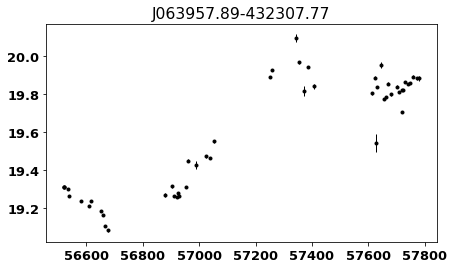

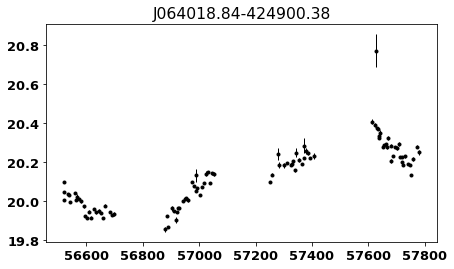

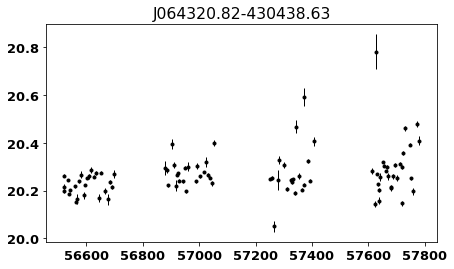

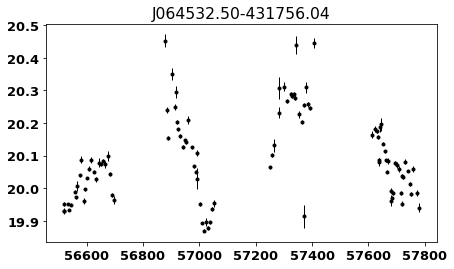

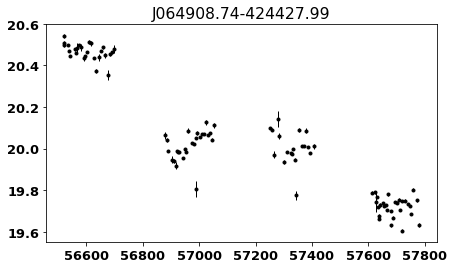

In [17]:
for i, name in enumerate(ID):
    mjd        = f_read[ID[i]+"/g_mjd"][:]
    flux       = f_read[ID[i]+"/g_flux_auto"][:]
    flux_error = f_read[ID[i]+"/g_flux_err_auto"][:]
    redshift   = 0.01
    
    lc = qso_drw(mjd, flux, flux_error, redshift, preprocess=False)
    lc.flux2mag()
    time, signal, error = lc.get_lc()
    
    
    ## plot 
    plt.figure(figsize=(7,4))
    #plt.scatter(time, signal, color='k')
    plt.errorbar(time, signal, yerr=error/2, fmt=".k", lw=1)
    plt.title(ID[i])
    
    #plt.savefig("./plot/"+str(ID[i])+".png")
    #plt.close()

### Data w/ preprocess

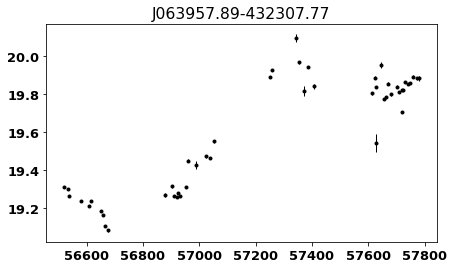

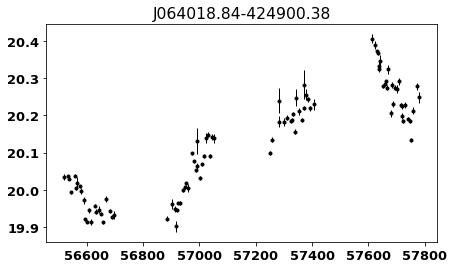

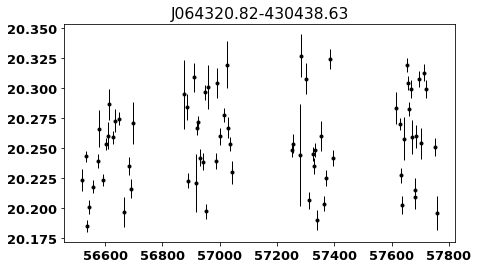

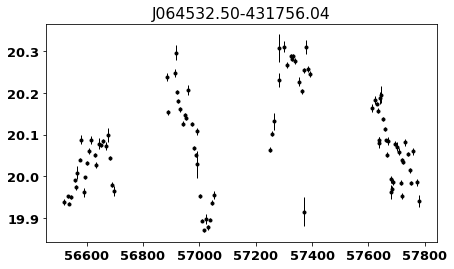

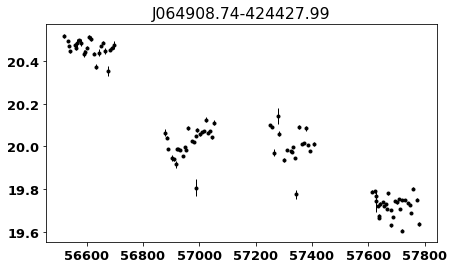

In [18]:
for i, name in enumerate(ID):
    mjd        = f_read[ID[i]+"/g_mjd"][:]
    flux       = f_read[ID[i]+"/g_flux_auto"][:]
    flux_error = f_read[ID[i]+"/g_flux_err_auto"][:]
    redshift   = 0.01
    
    lc = qso_drw(mjd, flux, flux_error, redshift)
    lc.flux2mag()
    time, signal, error = lc.get_lc()
    
    
    ## plot 
    plt.figure(figsize=(7,4))
    #plt.scatter(time, signal, color='k')
    plt.errorbar(time, signal, yerr=error/2, fmt=".k", lw=1)
    plt.title(ID[i])
    
    #plt.savefig("./plot/"+str(ID[i])+".png")
    #plt.close()